In [1]:
import pandas as pd
import os
from PIL import Image
from io import BytesIO

In [2]:
def create_image_df(folder_path, is_positive):
    # List to store file names and images
    file_data = []
    
    # Loop through all files in the folder
    for file in os.listdir(folder_path):
        # Check if the file is an image file
        if file.endswith(('.jpg', '.jpeg', '.png', '.gif')):
            # Open the image file
            image_path = os.path.join(folder_path, file)
            if is_positive:
                if 'bacteria' in file:
                    y_val = 'bacteria'
                elif 'virus' in file:
                    y_val = 'virus'
                else:
                    y_val = 'pneumonia'
            else:
                y_val = 'normal'
            with Image.open(image_path) as image:
                # Save the image to a byte array
                img_byte_arr = BytesIO()
                image.save(img_byte_arr, format=image.format)
                img_byte_arr = img_byte_arr.getvalue()
                # Append the file name and image to the list
                file_data.append({'File_Name': file, 'Image': img_byte_arr, 'y_val': y_val})
    
    # Create a DataFrame from the list of dictionaries
    return pd.DataFrame(file_data)

In [3]:
normal_test_df = create_image_df('./test/NORMAL', False)
pneumonia_test_df = create_image_df('./test/PNEUMONIA', True)
normal_train_df = create_image_df('./train/NORMAL', False)
pneumonia_train_df = create_image_df('./train/PNEUMONIA', True)
normal_val_df = create_image_df('./val/NORMAL', False)
pneumonia_val_df = create_image_df('./val/PNEUMONIA', True)

normal_train_df

,File_Name,Image,y_val
0,IM-0115-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
1,IM-0117-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
2,IM-0119-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
3,IM-0122-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
4,IM-0125-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
...,...,...,...
1336,NORMAL2-IM-1406-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
1337,NORMAL2-IM-1412-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
1338,NORMAL2-IM-1419-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
1339,NORMAL2-IM-1422-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal


In [4]:
pneumonia_train_df

,File_Name,Image,y_val
0,person1000_bacteria_2931.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
1,person1000_virus_1681.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,virus
2,person1001_bacteria_2932.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
3,person1002_bacteria_2933.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
4,person1003_bacteria_2934.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
...,...,...,...
3870,person99_virus_183.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,virus
3871,person9_bacteria_38.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
3872,person9_bacteria_39.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
3873,person9_bacteria_40.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria


In [5]:
pneumonia_val_df['y_val'].value_counts()

y_val
bacteria    8
Name: count, dtype: int64

In [6]:
pneumonia_train_df['y_val'].value_counts()

y_val
bacteria    2530
virus       1345
Name: count, dtype: int64

In [7]:
train_df = pd.concat([normal_train_df, pneumonia_train_df], ignore_index=True)
train_df

,File_Name,Image,y_val
0,IM-0115-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
1,IM-0117-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
2,IM-0119-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
3,IM-0122-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
4,IM-0125-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
...,...,...,...
5211,person99_virus_183.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,virus
5212,person9_bacteria_38.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
5213,person9_bacteria_39.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
5214,person9_bacteria_40.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria


In [8]:
test_df = pd.concat([normal_test_df, pneumonia_test_df], ignore_index=True)
test_df

,File_Name,Image,y_val
0,IM-0001-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
1,IM-0003-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
2,IM-0005-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
3,IM-0006-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
4,IM-0007-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
...,...,...,...
619,person96_bacteria_465.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
620,person96_bacteria_466.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
621,person97_bacteria_468.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
622,person99_bacteria_473.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria


In [9]:
val_df = pd.concat([normal_val_df, pneumonia_val_df], ignore_index=True)
val_df

,File_Name,Image,y_val
0,NORMAL2-IM-1427-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
1,NORMAL2-IM-1430-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
2,NORMAL2-IM-1431-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
3,NORMAL2-IM-1436-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
4,NORMAL2-IM-1437-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
5,NORMAL2-IM-1438-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
6,NORMAL2-IM-1440-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
7,NORMAL2-IM-1442-0001.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,normal
8,person1946_bacteria_4874.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria
9,person1946_bacteria_4875.jpeg,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...,bacteria


In [10]:
y_train = train_df['y_val']
X_train = train_df['Image']
y_test = test_df['y_val']
X_test = test_df['Image']
y_val = val_df['y_val']
X_val = val_df['Image']

In [11]:
y_train

0         normal
1         normal
2         normal
3         normal
4         normal
          ...   
5211       virus
5212    bacteria
5213    bacteria
5214    bacteria
5215    bacteria
Name: y_val, Length: 5216, dtype: object

In [12]:
X_train

0       b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
1       b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
2       b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
3       b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
4       b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
                              ...                        
5211    b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
5212    b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
5213    b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
5214    b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
5215    b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00...
Name: Image, Length: 5216, dtype: object

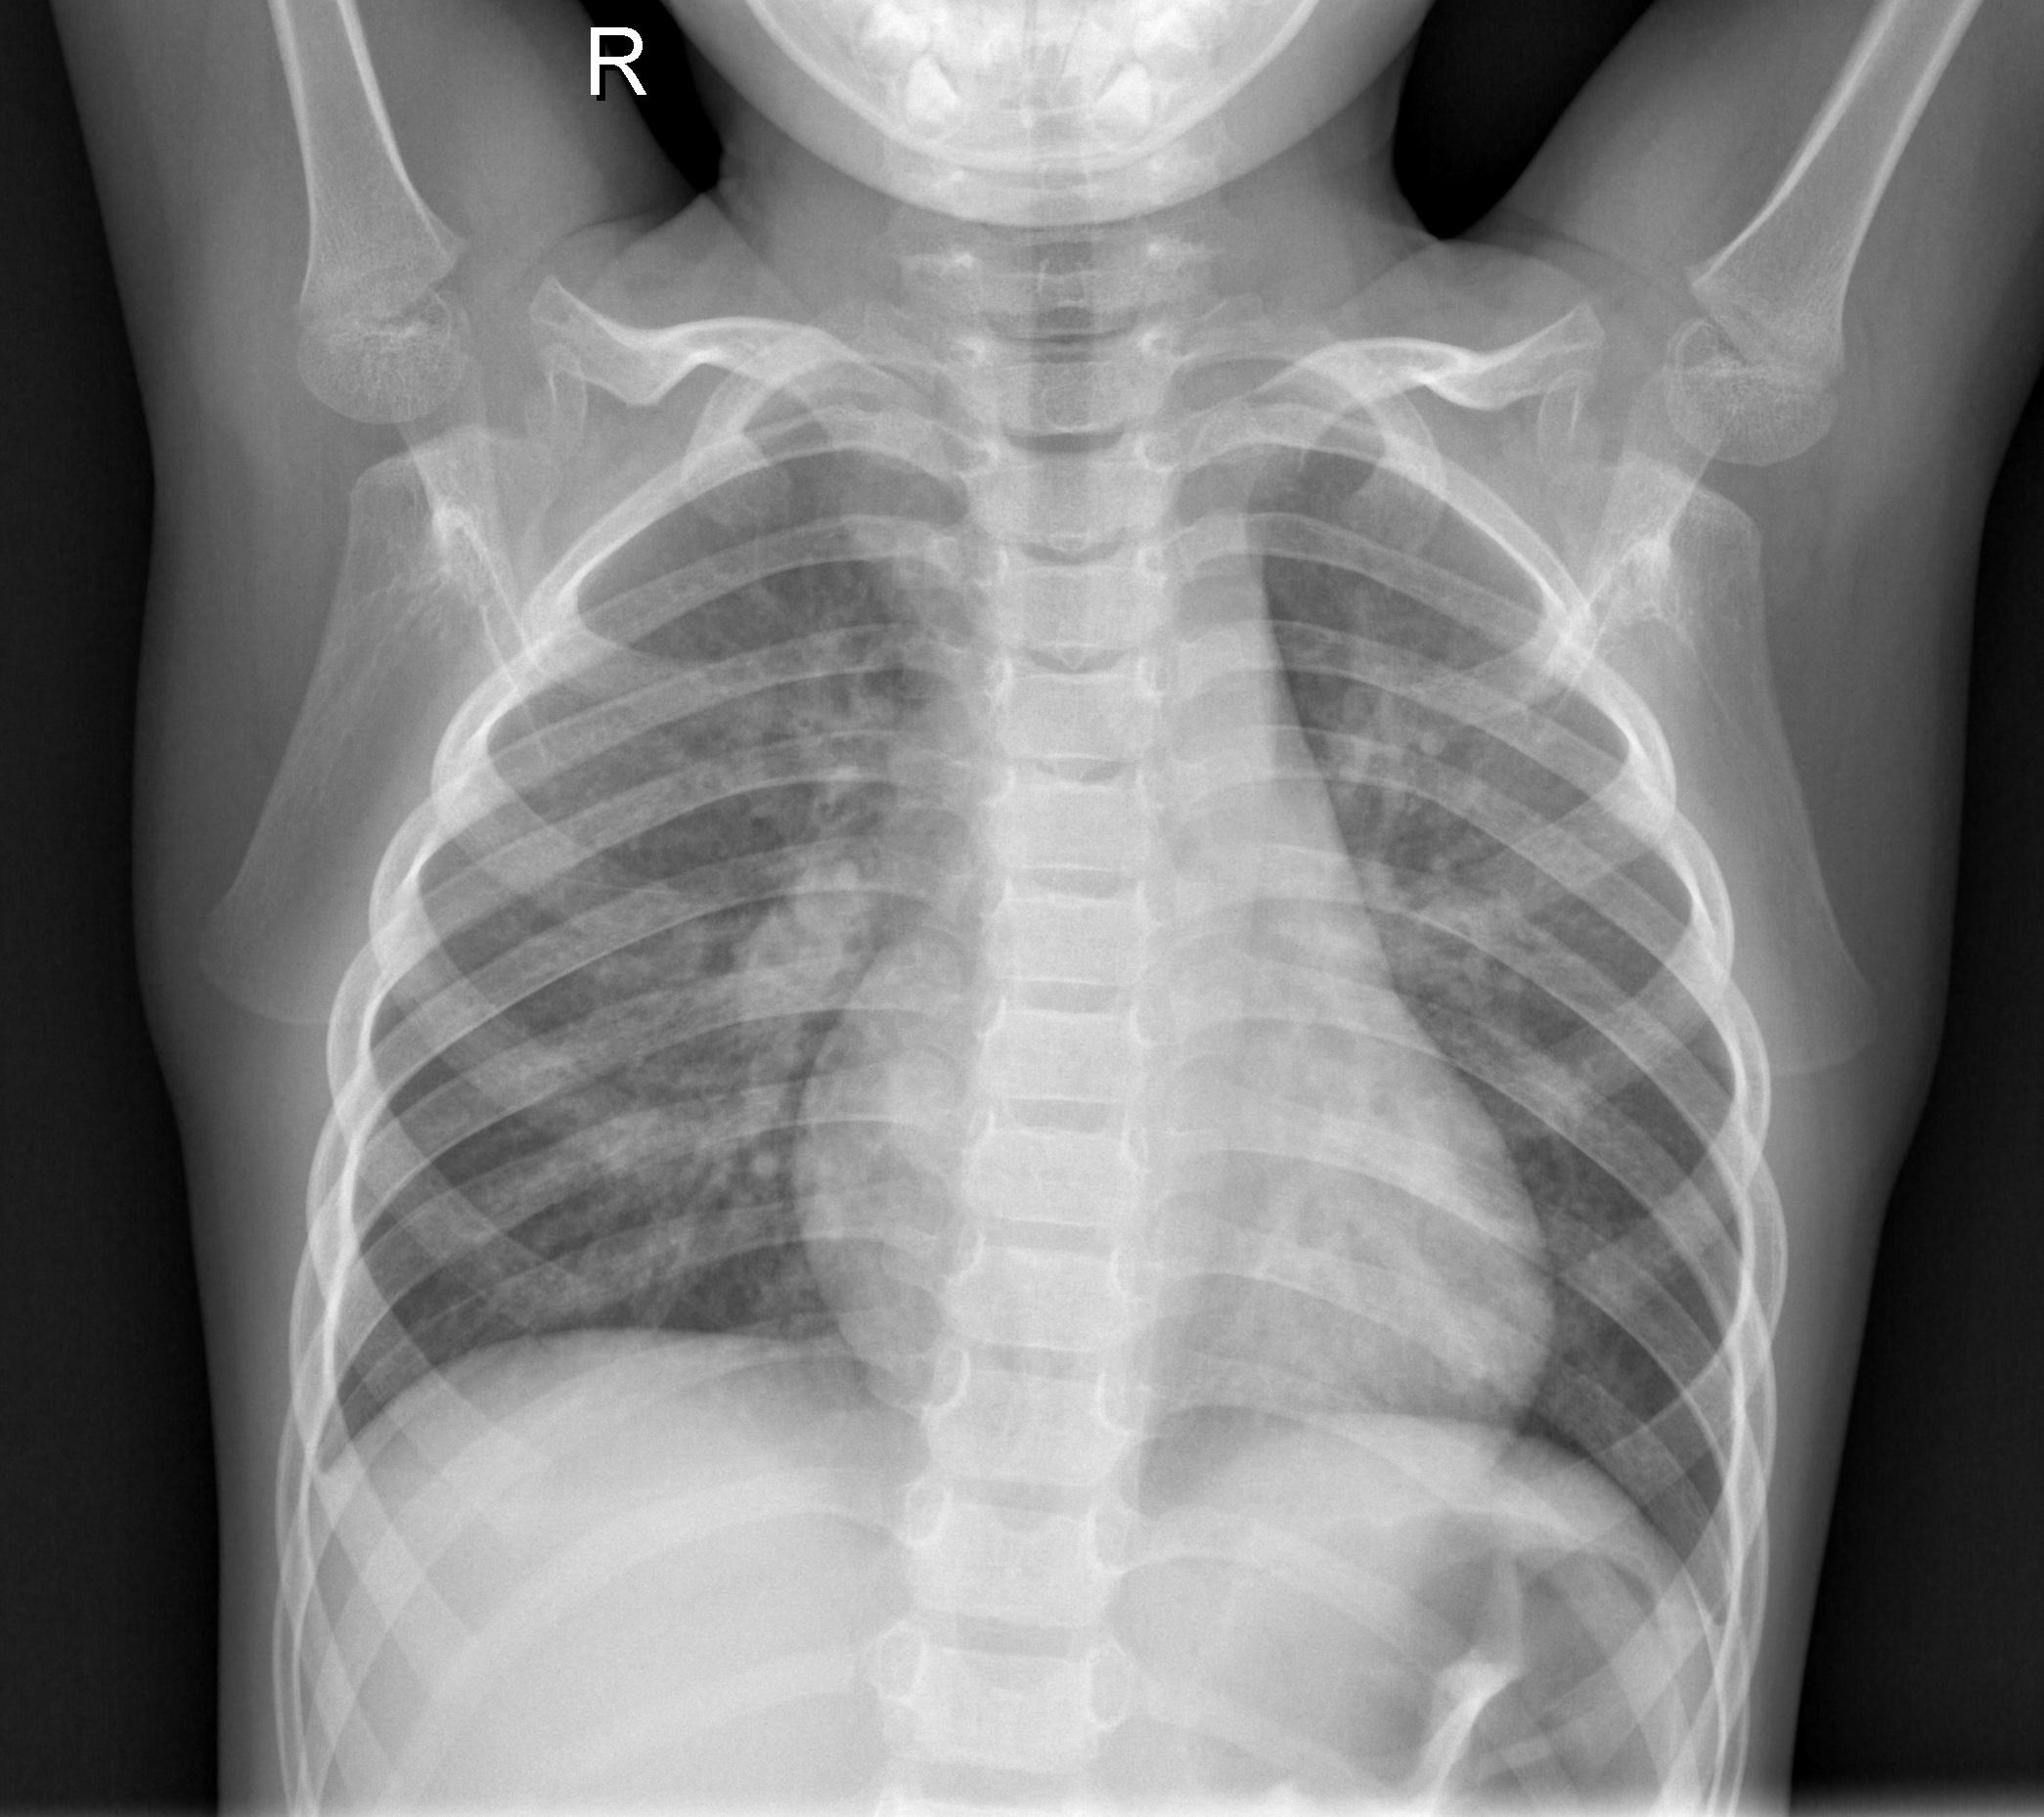

In [14]:
img_byte_arr = X_train[0]
img = Image.open(BytesIO(img_byte_arr))
display(img)